In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


filename = 'nba_player_data.csv'

In [33]:
pd.read_csv(filename)

,Year,Season_Type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,2014-15,Regular%20Season,201566,1,Russell Westbrook,1610612760,OKC,67,34.4,9.4,...,0.835,1.9,5.4,7.3,8.6,2.1,0.2,4.4,28.1,27.7
1,2014-15,Regular%20Season,201935,2,James Harden,1610612745,HOU,81,36.8,8.0,...,0.868,0.9,4.7,5.7,7.0,1.9,0.7,4.0,27.4,27.2
2,2014-15,Regular%20Season,2544,3,LeBron James,1610612739,CLE,69,36.1,9.0,...,0.710,0.7,5.3,6.0,7.4,1.6,0.7,3.9,25.3,25.3
3,2014-15,Regular%20Season,203076,4,Anthony Davis,1610612740,NOP,68,36.1,9.4,...,0.805,2.5,7.7,10.2,2.2,1.5,2.9,1.4,24.4,30.3
4,2014-15,Regular%20Season,202326,5,DeMarcus Cousins,1610612758,SAC,59,34.1,8.4,...,0.782,3.1,9.5,12.7,3.6,1.5,1.7,4.3,24.1,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,2023-24,Playoffs,1629626,136,Bol Bol,1610612756,PHX,3,4.3,0.3,...,0.000,0.0,1.3,1.3,0.0,0.3,0.0,0.0,0.7,1.7
4011,2023-24,Playoffs,1629026,137,Kenrich Williams,1610612760,OKC,7,4.4,0.3,...,0.000,0.1,1.0,1.1,0.4,0.1,0.0,0.0,0.6,1.4
4012,2023-24,Playoffs,1629637,138,Jaxson Hayes,1610612747,LAL,4,6.0,0.0,...,0.500,0.8,2.3,3.0,0.3,0.0,0.0,0.5,0.3,2.3
4013,2023-24,Playoffs,202330,139,Gordon Hayward,1610612760,OKC,7,6.6,0.0,...,0.000,0.1,1.7,1.9,0.4,0.1,0.1,0.0,0.0,2.1


In [34]:
def column_data(fname, column_offsets):
    data = np.loadtxt(fname, dtype=str, delimiter=',', usecols=column_offsets)
    return data


def getcolumns(fname):
    with open(fname) as fid:
        csv_reader = csv.reader(fid, delimiter=',')
        column_names = next(csv_reader)
    return np.array(column_names)

filename = 'nba_player_data.csv'

# Get column names and data
nba_cols = getcolumns(filename)
data = pd.read_csv(filename)

input = column_data(filename, range(len(nba_cols)))

# Extract offsets if needed for later functions
player_offset = list(nba_cols).index('PLAYER')
rank_offset = list(nba_cols).index('RANK')
year_offset = list(nba_cols).index('Year')
points_offset = list(nba_cols).index("PTS")

# Select relevant features for prediction
selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']

In [35]:
# Use to switch the player that you want to analyze
target_player = "LeBron James" 

#CHANGE desired stat to trend and predicted value for particular stat
desired_stat = 'PTS'

target_data = data[data['PLAYER'] == target_player]

X = target_data[selected_features]
y = target_data[['PTS', 'AST', 'REB', 'STL', 'BLK']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, train_size=0.9)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 1.6942013000000133
Mean Absolute Error (Random Forest): 0.8091000000000041
R-squared (Random Forest): -0.12612240787315718


In [36]:
all_player_predictions = []

for player_name in data['PLAYER'].unique():
    player_data = data[data['PLAYER'] == player_name]
    selected_features_input = ['PTS', 'AST', 'REB', 'STL', 'BLK']
    X_player = player_data[selected_features_input]
    player_predictions = rf_model.predict(X_player)
    predicted_stats = dict(zip(selected_features, player_predictions))
    predicted_stats['PLAYER'] = player_name
    all_player_predictions.append(predicted_stats)


# Convert the list of dictionaries to a DataFrame
predicted_stats_df = pd.DataFrame(all_player_predictions)

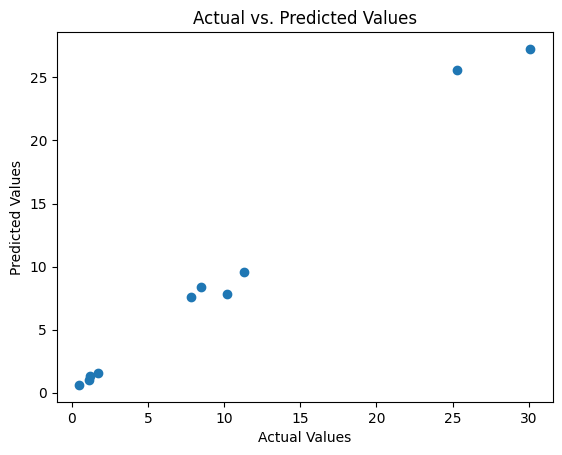

In [37]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

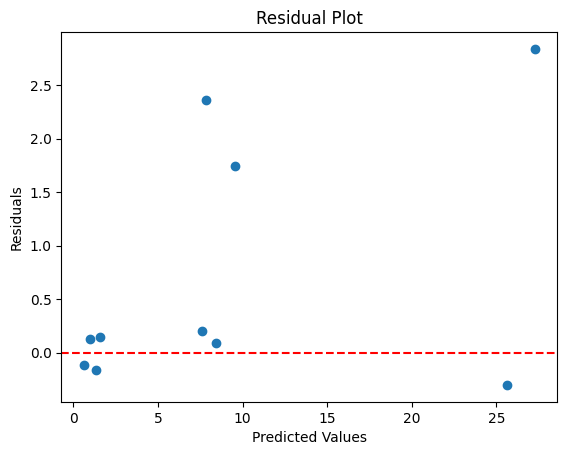

In [38]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  
plt.show()

In [39]:
def predict_player_stats(model, current_season_data, player):

    # Extract relevant features from the current season data
    selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']
    player_data = current_season_data[selected_features]

    # Predict stats for the next season
    predicted_stats_next_season = model.predict(player_data)

    print(predicted_stats_next_season)
    # Create a DataFrame for a more structured output
    predicted_stats_df = pd.DataFrame(data=predicted_stats_next_season, columns=selected_features, index=([player]*len(current_season_data)))
    
    pred_df = (predicted_stats_df.iloc[len(current_season_data)-1])

    return pred_df


# Call the function to get predictions
predictions_df = predict_player_stats(rf_model, target_data, target_player)

# Print or use the DataFrame as needed
print("Predicted Stats for the next Season:")
print(predictions_df)

[[25.112  7.527  6.537  1.57   0.635]
 [27.26   8.414  9.551  1.558  0.975]
 [25.234  7.238  7.253  1.426  0.609]
 [26.344  7.631  9.186  2.062  1.177]
 [26.521  8.635  8.567  1.263  0.658]
 [31.977  8.168  9.055  1.801  1.187]
 [27.42   8.988  8.764  1.377  0.863]
 [32.534  8.739  9.109  1.522  1.042]
 [25.602  7.833  7.599  1.362  0.617]
 [27.469  8.717 10.096  1.301  0.899]
 [23.895  7.902  7.235  1.486  0.403]
 [25.136  6.944  9.228  1.289  0.993]
 [25.547  7.951  7.391  1.364  0.552]
 [27.299  8.547  7.348  2.085  0.939]]
Predicted Stats for the next Season:
PTS    27.299
AST     8.547
REB     7.348
STL     2.085
BLK     0.939
Name: LeBron James, dtype: float64


In [40]:
def plot_predicted_stats(stats, real_career_df, predicted_stats, player_input):

    # Only account for regular season
    real_career = real_career_df[real_career_df['PLAYER'] == player_input].drop_duplicates(subset='Year')

    #Make X-axis the years of plot
    year_col = real_career['Year']
    xvalues = []
    for year in year_col:
        xvalues.append(year)

    #Make Y-axis the desired stat
    yvalues = []
    stat_column = real_career[stats]
    for stat in stat_column:
        yvalues.append(stat)
        
    #Append predicted stats
    predicted_stat = ((predicted_stats[stats]).iloc[-1])

    predicted_stat = predicted_stat.astype(float)
    xvalues.append('2024-25')
    yvalues.append(predicted_stat)

    plt.plot(range(len(xvalues)), yvalues)
    plt.xticks(range(len(xvalues)), xvalues, rotation='vertical')
    plt.ylabel(stats)
    plt.xlabel("Season")
    plt.title("Season averages of " + str(stats) + " for " + str(player_input))
    plt.show()

#Plot career data and predicted value for player
plot_predicted_stats(desired_stat, data, predictions_df, target_player)
    

AttributeError: 'numpy.float64' object has no attribute 'iloc'

In [41]:
df = pd.read_csv(filename)

players = df['PLAYER'].drop_duplicates()
players

0       Russell Westbrook
1            James Harden
2            LeBron James
3           Anthony Davis
4        DeMarcus Cousins
              ...        
3952     Dereck Lively II
3976         Ben Sheppard
3995             AJ Green
3999    Andre Jackson Jr.
4004        Nassir Little
Name: PLAYER, Length: 774, dtype: object

In [42]:
player_list = players.to_list()
player_list

['Russell Westbrook',
 'James Harden',
 'LeBron James',
 'Anthony Davis',
 'DeMarcus Cousins',
 'Stephen Curry',
 'LaMarcus Aldridge',
 'Blake Griffin',
 'Kyrie Irving',
 'Klay Thompson',
 'Dwyane Wade',
 'Rudy Gay',
 'Damian Lillard',
 'DeMar DeRozan',
 'Jimmy Butler',
 'Nikola Vucevic',
 'Gordon Hayward',
 'Chris Paul',
 'Monta Ellis',
 'Pau Gasol',
 'Victor Oladipo',
 'Kyle Lowry',
 'John Wall',
 'Marc Gasol',
 'Kemba Walker',
 'Dirk Nowitzki',
 'Brook Lopez',
 'Tobias Harris',
 'Eric Bledsoe',
 'Brandon Knight',
 'Andrew Wiggins',
 'Paul Millsap',
 'Al Jefferson',
 'Tyreke Evans',
 'Kawhi Leonard',
 'Isaiah Thomas',
 'Kevin Love',
 'JJ Redick',
 'Goran Dragic',
 'Zach Randolph',
 'Derrick Favors',
 'Wesley Matthews',
 'Jeff Teague',
 'Greg Monroe',
 'Mike Conley',
 'Jamal Crawford',
 'Chandler Parsons',
 'Lou Williams',
 'Enes Freedom',
 'Markieff Morris',
 'Bradley Beal',
 'Ty Lawson',
 'Al Horford',
 'Jeff Green',
 'Michael Carter-Williams',
 'Reggie Jackson',
 'Joe Johnson',
 'T

In [45]:
initial_data = data[data['PLAYER'] == player_list[0]]
t_data = data[data['PLAYER'] == player_list[0]]
    
X = t_data[selected_features]
y = t_data[['PTS', 'AST', 'REB', 'STL', 'BLK']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, train_size=0.8)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
    
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
df_player = predict_player_stats(rf_model, initial_data, player_list[0])


for t_player in player_list[1:]:
    try:
        t_data = data[data['PLAYER'] == t_player]
        
        X = t_data[selected_features]
        y = t_data[['PTS', 'AST', 'REB', 'STL', 'BLK']]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, train_size=0.9)
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

        # Train the model
        rf_model.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred_rf = rf_model.predict(X_test)
    
        df_player = pd.concat([df_player, predict_player_stats(rf_model, t_data, t_player)], ignore_index=False, axis=1)
    except:
        continue


[[27.127  8.766  7.485  2.034  0.253]
 [23.785 10.26   8.609  1.905  0.362]
 [25.696 10.651  7.419  2.4    0.167]
 [29.677 10.002 10.087  1.661  0.385]
 [29.116 10.042  9.86   1.736  0.36 ]
 [25.715 10.248  9.783  1.813  0.318]
 [28.069  9.012  8.912  1.723  0.36 ]
 [23.454 10.791 10.927  1.813  0.462]
 [22.39   9.497  9.39   1.528  0.547]
 [26.456  7.919  8.153  1.624  0.453]
 [23.176 10.918 10.895  1.529  0.472]
 [20.397  8.619  8.438  1.284  0.405]
 [19.643  7.738  7.656  1.167  0.406]
 [17.253  7.558  6.589  1.094  0.508]
 [23.008  8.019  8.029  1.336  1.044]
 [12.375  5.061  5.367  1.115  0.369]
 [10.6    3.789  5.273  1.236  0.479]]
[[27.862  7.277  5.694  1.841  0.636]
 [27.541  7.607  5.71   1.708  0.453]
 [28.842  7.566  5.907  1.72   0.609]
 [27.38   7.582  5.354  2.177  0.337]
 [29.395  9.587  7.039  1.625  0.58 ]
 [28.274  8.169  5.574  1.856  0.539]
 [29.802  8.409  5.539  1.777  0.68 ]
 [28.706  7.157  5.365  2.087  0.587]
 [34.451  7.63   6.398  1.916  0.733]
 [31.544  6

In [46]:
df_player

,Russell Westbrook,James Harden,LeBron James,Anthony Davis,DeMarcus Cousins,Stephen Curry,LaMarcus Aldridge,Blake Griffin,Kyrie Irving,Klay Thompson,...,Haywood Highsmith,Chet Holmgren,Jalen Suggs,Jaime Jaquez Jr.,Sam Merrill,Jordan Hawkins,Jaden Hardy,Cason Wallace,Peyton Watson,Jaylin Williams
PTS,10.600,20.979,28.304,25.562,15.180,26.769,18.730,13.713,22.488,18.388,...,4.410,15.6,12.6,12.8,3.3,7.8,7.3,6.8,6.7,4.0
AST,3.789,8.394,8.659,2.927,1.996,5.370,2.293,3.015,5.010,2.302,...,1.262,2.1,2.7,3.0,0.9,1.0,1.5,1.5,1.1,1.6
REB,5.273,4.889,7.902,10.003,5.588,4.834,7.612,6.629,3.747,3.552,...,2.410,7.2,3.1,3.3,1.2,2.2,1.8,2.3,3.2,3.4
STL,1.236,1.050,2.004,1.133,0.848,1.002,0.676,0.837,1.103,0.677,...,0.304,0.7,1.4,0.8,0.0,0.3,0.3,0.9,0.5,0.4
BLK,0.479,0.892,0.973,1.842,0.520,0.362,1.460,0.480,0.334,0.512,...,0.174,2.5,0.6,0.5,0.0,0.1,0.1,0.5,1.1,0.4


In [47]:
df_player = df_player.transpose()
df_player

,PTS,AST,REB,STL,BLK
Russell Westbrook,10.600,3.789,5.273,1.236,0.479
James Harden,20.979,8.394,4.889,1.050,0.892
LeBron James,28.304,8.659,7.902,2.004,0.973
Anthony Davis,25.562,2.927,10.003,1.133,1.842
DeMarcus Cousins,15.180,1.996,5.588,0.848,0.520
...,...,...,...,...,...
Jordan Hawkins,7.800,1.000,2.200,0.300,0.100
Jaden Hardy,7.300,1.500,1.800,0.300,0.100
Cason Wallace,6.800,1.500,2.300,0.900,0.500
Peyton Watson,6.700,1.100,3.200,0.500,1.100


In [48]:
df_player.to_csv('nba_predicted_player_data.csv')